<a href="https://colab.research.google.com/github/GeorgeDavila/MachineLearningMiscellaneous/blob/master/Apple_Stock_Prediction_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a toy example. To build a system that works you would need to use Deep Reinforcement learning. And approach the stock market similar to playing a game. The system should be able to identify Good Risk to Reward setups and continuously monitor price action to ascertain whether the odds have changed. It is not enough to just predict the price action. The system should provide a good entry price a stop loss price and a profit exit price.

In [0]:
!pip install -q scikit-learn #installs scikit-learn


In [0]:
import csv #library to manage csv files
import numpy as np
from sklearn.svm import SVR #The sklearn.svm module includes Support Vector Machine algorithms., SVR allows for support vector regression
import matplotlib.pyplot as plt

In [0]:
#Upload aaplstockpriceOct2018.csv apple stock data local file to this notebook
from google.colab import files
uploaded = files.upload() 

Saving aaplstockpriceOct2018.csv to aaplstockpriceOct2018.csv


In [0]:
#See the uploaded csv
print(uploaded['aaplstockpriceOct2018.csv'][:200].decode('utf-8') + '...') #Shows what the csv file looks like

Date,High (Euros ),Low,Last,Previous Day Price,Volume
10/31/2018,194.49,189.43,193.55,188.81,2006
10/30/2018,189.1,184.91,188.81,186.46,2056
10/29/2018,193.25,182.5,186.46,192.07,6212
10/26/2018,1...


A support vector machine (SVM) is a linear separator, takes data thats already classified and tries to predict a class of unclassified data (for stocks the 'unclasssied' data is future price)

The kernel signifies the type of SVM

In the SVR fn C determines line of separation in SVM separation. Low C gives largest minimum margin whereas BIG C value gives a line which correctly separates as many instances as possible. Cant always have both so we use big C value here for better separation. 

SVR using radial basis function (svr_rbf) defines similarity to be the euclidean distance between two inputs. So if both on top of each other max similarity is 1, too far and its 0. Our GAMMA in the svr_rbf fn defines how far is too far




The 'no free lunch theorem' states there are no optimizations guarunteed to work best in all scenarios so we use both linear and polynomial support vector regression



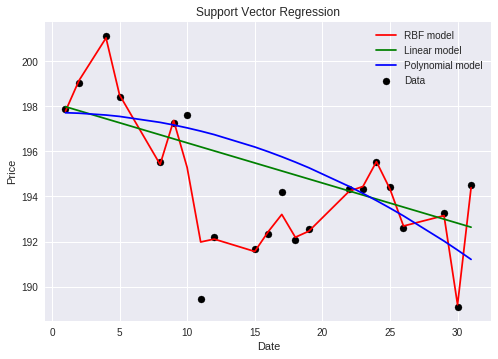

(193.15008075420775, 192.99333333355406, 192.02161289908554)


In [0]:
dates = [] #Create empty lists 
prices = [] 

#fill lists from data in a csv file
def get_data(filename): #1st helper fn, retrieves the data from the csv file 
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('/')[1])) #Picks out day of the month as 'date' data, day is in middle of 10/31/2018 format so we use index [1]
            prices.append(float(row[1]))
    return
  
def predict_prices(dates, prices, x):  #2nd & last helper function #x used down in return fn specifications
    dates = np.reshape(dates, (len(dates),1))
    
    svr_lin = SVR(kernel= 'linear', C=1e3) #linear SVR
    svr_poly = SVR(kernel= 'poly', C=1e3, degree = 2) #polynomial SVR
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) #SVR using radial basis function # Our gamma in the svr_rbf fn defines how far in the euclidean separation is too far
    svr_lin.fit(dates, prices) 
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0] 
  
get_data('aaplstockpriceOct2018.csv') #1st helper fn, defined above. Used so we dont have to clutter 2nd helper fns with csv commands

predicted_price = predict_prices(dates,prices, 29)
print(predicted_price)
    
    

*Red clearly overfitted to traing data but seems to yield predictions similar to less-fitted lines (see prediction for day 29 in list below chart, not too bad in this instance, got trend right) *

**The graph fits to the training data, i don't plot predicted points but you can print predicted data points to command line using the 2nd helper function.**

Note these data sets are from EU stock exchange, prices in euros.

You can see the predictions for the 29th day in the list below the chart. From the predict_prices(dates,prices, 29) fn. The regression plot  

Now we'll plot predictions along with the regression



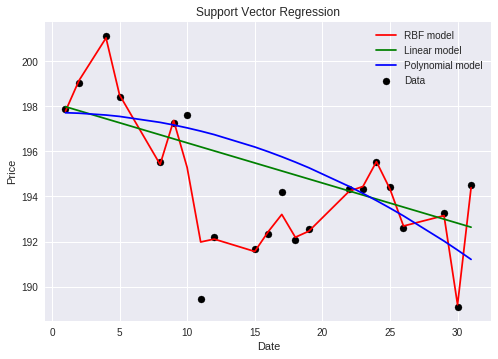

(193.15008075420775, 192.99333333355406, 192.02161289908554, 194.43962813266523, 195.54269012536807, 194.3301680860684, 192.6896736939821)


In [0]:
dates = [] #Create empty lists 
prices = [] 

#fill lists from data in a csv file
def get_data(filename): #1st helper fn, retrieves the data from the csv file 
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('/')[1])) #Picks out day of the month as 'date' data, day is in middle of 10/31/2018 format so we use index [1]
            prices.append(float(row[1]))
    return
  
def predict_prices(dates, prices, x):  #2nd & last helper function #x used down in return fn specifications
    dates = np.reshape(dates, (len(dates),1))
    
    svr_lin = SVR(kernel= 'linear', C=1e3) #linear SVR
    svr_poly = SVR(kernel= 'poly', C=1e3, degree = 2) #polynomial SVR
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) #SVR using radial basis function # Our gamma in the svr_rbf fn defines how far in the euclidean separation is too far
    svr_lin.fit(dates, prices) 
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0], svr_rbf.predict(23)[0], svr_rbf.predict(24)[0], svr_rbf.predict(25)[0], svr_rbf.predict(26)[0], 
  
get_data('aaplstockpriceOct2018.csv') #1st helper fn, defined above. Used so we dont have to clutter 2nd helper fns with csv commands

#Predicted Prices:
predicted_price = predict_prices(dates,prices, 29) # <-- this alone will give regression plot, bc plot command inside predict_prices helper fn
print(predicted_price) # <-- this will give numerical value of prediction for 29th day

    

Now we'll do 3 months of Apple stock data, Aug 2018 - Oct 2018

Days listed as 1 to 65, with 1 being the starting day and 
Although its 3 months of stock data, no trades on weekends and some holidays, hence the 65 days

*Obviously more data, so training longer, tried 2 yrs but took too long on colab cloud gpu, so were doing 3 months now*

In [0]:
#Upload aaplstockpriceAug2018throughOct2018_AltDateFormat.csv   apple stock data local file to this notebook
from google.colab import files
uploaded = files.upload() 

Saving aaplstockpriceAug2018throughOct2018_AltDateFormat.csv to aaplstockpriceAug2018throughOct2018_AltDateFormat.csv


In [0]:
#See the uploaded csv
print (uploaded['aaplstockpriceAug2018throughOct2018_AltDateFormat.csv'][:200].decode('utf-8') + '...') #Shows what the csv file looks like

Date ,High (Euros ),Low,Last,Previous Day Price
65,194.49,189.43,193.55,188.81
64,189.1,184.91,188.81,186.46
63,193.25,182.5,186.46,192.07
62,192.59,188.8,192.07,194.43
61,194.43,190.01,194.43,18...


In [0]:
dates = [] #Create empty lists 
prices = [] 

#fill lists from data in a csv file
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('/')[0])) #list days as 1 to 65, with 1 the 1st tradeing day of Aug, 65 the last trading dy of Oct
            prices.append(float(row[1]))
    return
  
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1))
    
    svr_lin = SVR(kernel= 'linear', C=1e3) #linear SVR
    svr_poly = SVR(kernel= 'poly', C=1e3, degree = 2) #polynomial SVR
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) #SVR using radial basis function # Our gamma in the svr_rbf fn defines how far in the euclidean separation is too far
    svr_lin.fit(dates, prices) 
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]
  
get_data('aaplstockpriceAug2018throughOct2018_AltDateFormat.csv')

predicted_price = predict_prices(dates,prices, 29)
print(predicted_price)
    